## Section 1: Define the graph

The graph is defined as an adjacency matrix. This allows for an easy representation.
The implementation of the adjacency matrix is in form of a two dimensional list.

* __To define a `graph`, reassign the <kbd>graphMatrix</kbd> to a new `adjacency matrix`.__
* __The `nodes` are referenced using `intergers` ranging from <kbd>0</kbd> through <kbd>n-1</kbd>.__
* __The `directed edges` are defined with their associated cost ranging between <kbd>float("-inf")</kbd> and <kbd>float("inf")</kbd>.__
* __Negetive costs leading to possible `negetive weight cycle(s) are not allowed`.__ 
* __To define an `edge that does not exist`, define it's cost as <kbd>float("inf")</kbd>.__
* __To define a `directly connected edge`, define it's cost as the <kbd>actual cost</kbd> of the edge.__
* __The cost for the `node to itself` is defined as <kbd>0</kbd>.__

In [35]:
'''Defining the graph'''

from random import seed
from random import randint
import time

seed(time.time())

'''
#Fixed value data set
graphMatrix  = [[0, 1, 799, 755, float("inf")],
                [10, 0, 1, 29, float("inf")],
                [35, 130, 0, 6, 2],
                [19, 111, 15, 0, float("inf")],
                [6, 14, 5, 67, 0],
               ]
'''
#Random value data set
#The values are limited between 0 and 100 in the random matrix for manual tractability

graphMatrix  = [[0, randint(0, 100), randint(0, 100), randint(0, 100), randint(0, 100)],
                [randint(0, 100), 0, randint(0, 100), randint(0, 100), randint(0, 100)],
                [randint(0, 100), randint(0, 100), 0, randint(0, 100), randint(0, 100)],
                [randint(0, 100), randint(0, 100), randint(0, 100), 0, randint(0, 100)],
                [randint(0, 100), randint(0, 100), randint(0, 100), randint(0, 100), 0],
               ]

print("The generated graphMatrix")
print(graphMatrix)

The generated graphMatrix
[[0, 72, 6, 95, 82], [27, 0, 48, 23, 28], [58, 26, 0, 30, 92], [18, 83, 100, 0, 0], [9, 9, 30, 96, 0]]


## Section 2: Generate the original graph for reference

The original graph is generated and rendered for reference

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

#Add the nodes
for i in range(len(graphMatrix)):
    G.add_node(i)
    
#Add the edges
for i in range(len(graphMatrix)):
    for j in range(len(graphMatrix)):
        if i!=j and graphMatrix[i][j]<float("inf"):
            G.add_edge(i, j, weight = min(graphMatrix[i][j], graphMatrix[j][i]))

The costs rendered on the edges is calculates as `min(graphMatrix[i][j], graphMatrix[j][i])` where `i` and `j` are the nodes at the end of the edges. In case of bidirectional edges with varied costs, only the minimum cost is displayed due to the limitation of the graphing package `networkx`, as it does not support rendering parallel edges. 

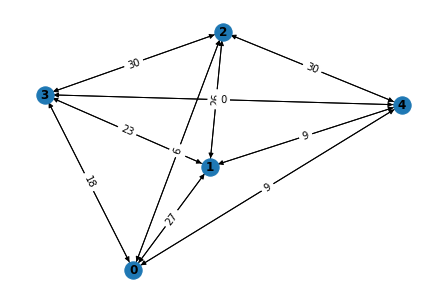

In [37]:
#Render the original graph
gPos = nx.spring_layout(G)
nx.draw(G, with_labels=True, font_weight='bold', pos=gPos)
labels = nx.get_edge_attributes(G, 'weight')
q = nx.draw_networkx_edge_labels(G, pos=gPos, edge_labels=labels)

## Section 3: Take the user input for source

In [38]:
start = input("Enter the source: ")
start = int(start)

while start>=len(graphMatrix) or start<0:
    start = input("Invalid source. Please enter the source again: ")
    start = int(start)

Enter the source: 3


## Section 4: Implement `Djikstra's algorithm (Greedy shortest path)`

For implementing `Djikstra's algorithm`: 
* __A priority queue `[Min Heap]` is created and used to determine the next node that must be explored on the basis of cost to the reach the node.__
* __Once the node is explored, the nodes associated with the explored node is added to the priority queue.__
* __The process continues until all nodes directly and indirectly connected to the source have been explored.__
* __A `sleepDelay` is enforced to smoothen the flow of render. `Default value is 0 second`__

In [39]:
#Sleep delay to smoothen the render
sleepDelay = 0

### Initilize the `Min Heap`, distance table, sleepDelay and exploration graph
### The output is rendered in a scrollable sub window. To disable scrolling (recommended), do this:
<kbd>Select the cell below -> Click on Cell on Main Menu Bar -> Click on Current Outputs -> Click on Toggle Scrolling </kbd>

Adding edge 3 -> 0 to Min Heap with cost 18
Adding edge 3 -> 1 to Min Heap with cost 83
Adding edge 3 -> 2 to Min Heap with cost 100
Adding edge 3 -> 4 to Min Heap with cost 0


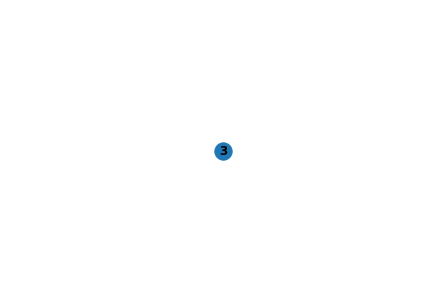

In [40]:
#Generate distance table
table = dict()
for j in range(len(graphMatrix[start])):
    if j==start:
        table[j] = (graphMatrix[start][j], start)
    else:
        table[j] = (float("inf"), start)

#Create the priority queue
import heapq
minHeap = []

#Initialize the minHeap
for j in range(len(graphMatrix[start])):
    cost = graphMatrix[start][j]
    node = j
    #Ensures the start node is not added and disconnected nodes are not added
    if cost < float("inf") and node!=start:
        print("Adding edge", start, "->",  node, "to Min Heap", "with cost", cost)
        heapq.heappush(minHeap, (cost, node, start))
    
#Create the exploration graph
E = nx.DiGraph()
E.add_node(start) 

#Print the exploration graph
plt.clf()
nx.draw(E, with_labels=True, font_weight='bold', pos=gPos)
labels = nx.get_edge_attributes(E, 'weight')
q = nx.draw_networkx_edge_labels(E, pos=gPos, edge_labels=labels)
plt.show()

### Run `Djikstra's algorithm`

### Wait for `Run Complete` to appear after running the next cell before moving on to the cell after

### The output is rendered in a scrollable sub window. To disable scrolling (recommended), do this:
<kbd>Select the cell below -> Click on Cell on Main Menu Bar -> Click on Current Outputs -> Click on Toggle Scrolling </kbd>

Step number# 1
Popping from Min Heap
Proposed next edge is from node 3 to node 4
Current best cost to node 4 : inf
Proposed cost if traversing to node 4 via node 3 : 0
Optimal cost : 0
Updating distance table to new cost and route

Exploring Node: 4 at cost 0
Route taken: 3 -> 4

Adding edge 4 -> 0 to Min Heap with cost 9
Adding edge 4 -> 1 to Min Heap with cost 9
Adding edge 4 -> 2 to Min Heap with cost 30
Adding edge 4 -> 3 to Min Heap with cost 96



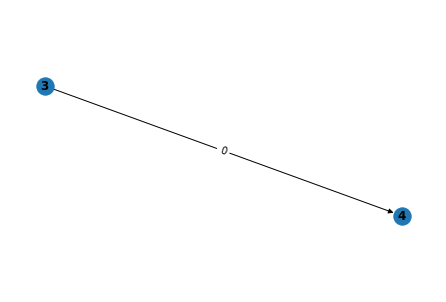

Step number# 2
Popping from Min Heap
Proposed next edge is from node 4 to node 0
Current best cost to node 0 : inf
Proposed cost if traversing to node 0 via node 4 : 9
Optimal cost : 9
Updating distance table to new cost and route

Exploring Node: 0 at cost 9
Route taken: 3 -> 4 -> 0

Adding edge 0 -> 1 to Min Heap with cost 81
Adding edge 0 -> 2 to Min Heap with cost 15
Adding edge 0 -> 3 to Min Heap with cost 104
Adding edge 0 -> 4 to Min Heap with cost 91



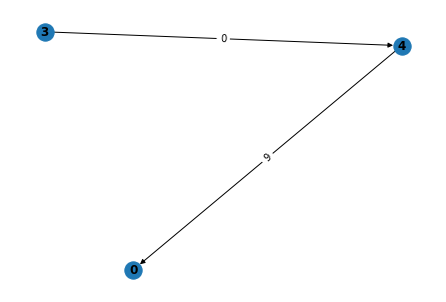

Step number# 3
Popping from Min Heap
Proposed next edge is from node 4 to node 1
Current best cost to node 1 : inf
Proposed cost if traversing to node 1 via node 4 : 9
Optimal cost : 9
Updating distance table to new cost and route

Exploring Node: 1 at cost 9
Route taken: 3 -> 4 -> 1

Adding edge 1 -> 0 to Min Heap with cost 36
Adding edge 1 -> 2 to Min Heap with cost 57
Adding edge 1 -> 3 to Min Heap with cost 32
Adding edge 1 -> 4 to Min Heap with cost 37



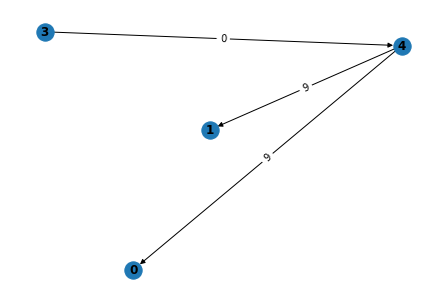

Step number# 4
Popping from Min Heap
Proposed next edge is from node 0 to node 2
Current best cost to node 2 : inf
Proposed cost if traversing to node 2 via node 0 : 15
Optimal cost : 15
Updating distance table to new cost and route

Exploring Node: 2 at cost 15
Route taken: 3 -> 4 -> 0 -> 2

Adding edge 2 -> 0 to Min Heap with cost 73
Adding edge 2 -> 1 to Min Heap with cost 41
Adding edge 2 -> 3 to Min Heap with cost 45
Adding edge 2 -> 4 to Min Heap with cost 107



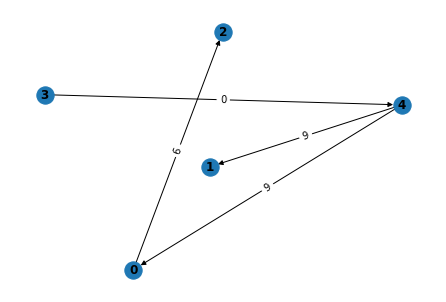

Step number# 5
Popping from Min Heap
Proposed next edge is from node 3 to node 0
Current best cost to node 0 : 9
Proposed cost if traversing to node 0 via node 3 : 18
Optimal cost : 9
Not updating distance table

Step number# 6
Popping from Min Heap
Proposed next edge is from node 4 to node 2
Current best cost to node 2 : 15
Proposed cost if traversing to node 2 via node 4 : 30
Optimal cost : 15
Not updating distance table

Step number# 7
Popping from Min Heap
Proposed next edge is from node 1 to node 3
Current best cost to node 3 : 0
Proposed cost if traversing to node 3 via node 1 : 32
Optimal cost : 0
Not updating distance table

Step number# 8
Popping from Min Heap
Proposed next edge is from node 1 to node 0
Current best cost to node 0 : 9
Proposed cost if traversing to node 0 via node 1 : 36
Optimal cost : 9
Not updating distance table

Step number# 9
Popping from Min Heap
Proposed next edge is from node 1 to node 4
Current best cost to node 4 : 0
Proposed cost if traversing to no

In [41]:
import time
node = None
steps = 1

#Run Djikstra
while(minHeap):
    #Pop the minimum cost node from the heap
    minNode = heapq.heappop(minHeap)
    cost = minNode[0]
    node = minNode[1]
    source  = minNode[2]
    print("Step number#", steps)
    print("Popping from Min Heap")
    print("Proposed next edge is from node", source, "to node", node)
    steps += 1
    #Update the table
    if table[node][0]>cost:
        print("Current best cost to node", node, ":", table[node][0])
        print("Proposed cost if traversing to node", node, "via node", source, ":", cost)
        print("Optimal cost :", cost)
        print("Updating distance table to new cost and route")
        print()
        table[node] = (cost, source)
    else:
        print("Current best cost to node", node, ":", table[node][0])
        print("Proposed cost if traversing to node", node, "via node", source, ":", cost)
        print("Optimal cost :", table[node][0])
        print("Not updating distance table")
        print()
        time.sleep(sleepDelay)
        continue
            
    #Add the node and the edges to the exploration graph
    E.add_node(node)
    E.add_edge(source, node, weight=graphMatrix[source][node])
    
    print("Exploring Node:", node, "at cost", cost)
    print("Route taken:", end = " " )
    route = []
    tempNode = node
    while(True):
        if tempNode==start:
            route.append(tempNode)
            break
        else:
            route.append(tempNode)
            tempNode = table[tempNode][1]
    route = route[::-1]
    for i, x in enumerate(route):
        if i!=(len(route)-1):
            print(x, end=" ")
            print("->", end=" ")
        else:
            print(x)
            print()
    
    
    #Add the new peripheral nodes to the minHeap
    for j in range(len(graphMatrix[node])):
        dNode = j
        cost = graphMatrix[node][j] + table[node][0]
        #To eliminate self loop
        if dNode==node:
            continue
        #Add only if the path is better than the optimum traversed path
        #elif cost<table[dNode][0]:
        else:
            print("Adding edge", node, "->",  dNode, "to Min Heap", "with cost", cost)
            heapq.heappush(minHeap, (cost, dNode, node))
    print()       
    #Print the updated graph
    plt.clf()
    nx.draw(E, with_labels=True, font_weight='bold', pos = gPos)
    labels = nx.get_edge_attributes(E, 'weight')
    q = nx.draw_networkx_edge_labels(E, pos=gPos, edge_labels=labels)
    plt.show()
    
        
    #Time to sleep, before the iterating over the next cycle, to slow down the process
    time.sleep(sleepDelay)
    
print("Run complete")

### Check if `Run Complete` appeared in the output of the last line of the previous cell and then proceed

## Section 5: Printing the final distance values and the route

### The optimal distance values and route as calculated by `Djikstra's algorithm`

### The output is rendered in a scrollable sub window. To disable scrolling (recommended), do this:
<kbd>Select the cell below -> Click on Cell on Main Menu Bar -> Click on Current Outputs -> Click on Toggle Scrolling </kbd>

In [42]:
#Create a final route graph
R = nx.DiGraph()

print("Final distance table and route")

#Print the final cost and route for each node
for node in table:
    print("Destination", node)
    print("Cost", table[node][0])
    if table[node][0]==float("inf"):
        print("Route taken:", None)
        continue
        
    route = []
    print("Route taken", end = " ")
    tempNode = node
    
    while(True):
        if tempNode==start or tempNode==None:
            route.append(tempNode)
            break
        else:
            route.append(tempNode)
            tempNode = table[tempNode][1]
    
    route = route[::-1]
    
    for i in range(len(route)):
        if route[i]==None:
            print(route[i])
            break
            
        elif i<len(route)-1:
                print(route[i], "->", end = " ")
                
        else:
            print(route[i])
            print()
    
    #Add the edges involved in the final Route     
    i = 0
    while(i<len(route)-1):
        R.add_edge(route[i], route[i+1], weight = graphMatrix[route[i]][route[i+1]])
        i += 1

Final distance table and route
Destination 0
Cost 9
Route taken 3 -> 4 -> 0

Destination 1
Cost 9
Route taken 3 -> 4 -> 1

Destination 2
Cost 15
Route taken 3 -> 4 -> 0 -> 2

Destination 3
Cost 0
Route taken 3

Destination 4
Cost 0
Route taken 3 -> 4



The final render of the paths excluding the suboptimal edges

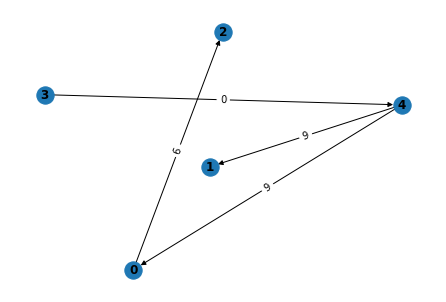

In [43]:
#Print the final route graph
plt.clf()
nx.draw(R, with_labels=True, font_weight='bold', pos=gPos)
labels = nx.get_edge_attributes(R, 'weight')
q = nx.draw_networkx_edge_labels(R, pos=gPos, edge_labels=labels)
plt.show()